# Diabetes Prediction Model

In this project, I have developed and deployed a Machine Learning Application to predict the possibility of a person having diabetes. I have used the PIMA India Diabetes Dataset to train the model. The model requires the user to input the following variables to predict if the person would have diabetes or not: Glucose levels, Blood Pressure, Insulin levels, BMI, and Age. On entering these variables the application will return the probability of the person having diabetes. 
In this notebook, I have detailed the process followed to build the Machine Learning application. 

Image of the Landing Page of Application:

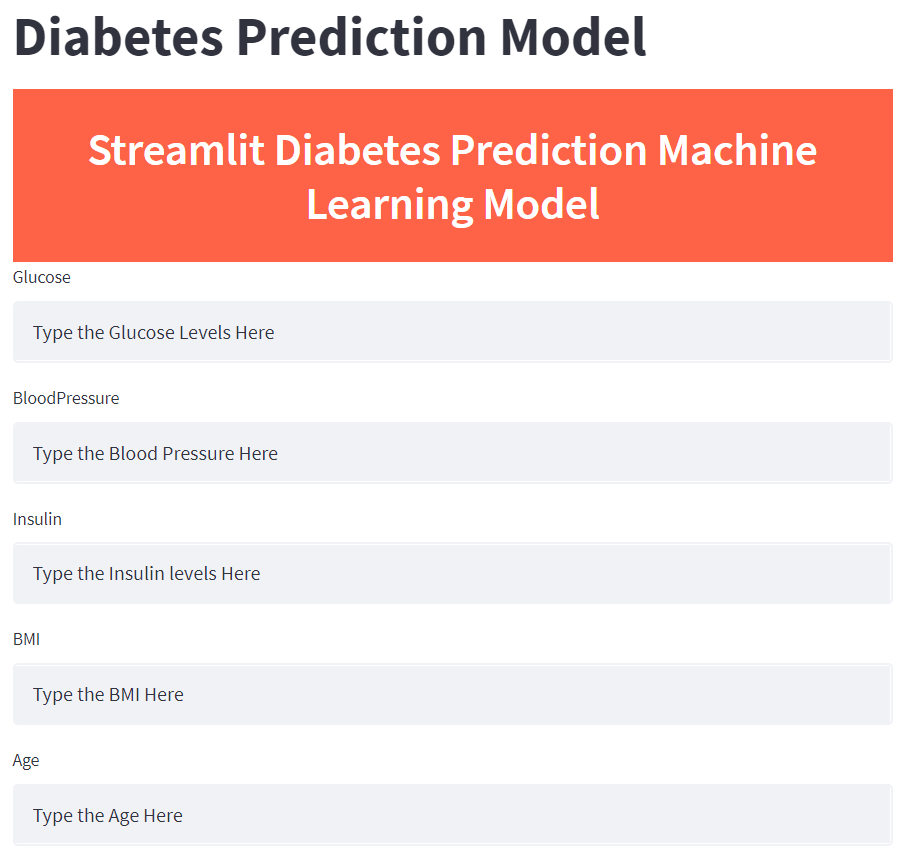

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, plot_roc_curve
import pickle

In [10]:
# Loading Data
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
#Isolating the Outcome column as its the target vector
y = df["Outcome"]
# Feature Vectors in this model, Glucose, BloodPressure, Insulin, BMI, Age
X = df.drop(columns=["Pregnancies", "Outcome", "SkinThickness", "DiabetesPedigreeFunction"])

In [12]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train.values.ravel())
RandomForestClassifier()
#Saving the model on disk to be used later on while loading the application
pickle.dump(random_forest, open("model.pkl", "wb"))

In [13]:
#Making predictions
y_pred = random_forest.predict(X_test)
print(random_forest.score(X_test, y_test))
print(accuracy_score(y_test, y_pred))

0.7401574803149606
0.7401574803149606


<AxesSubplot:>

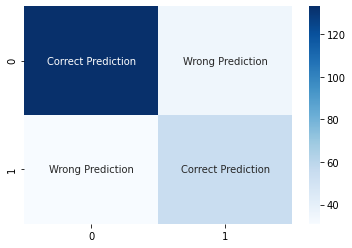

In [14]:
#Confusion Matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
#Setting the labels in the plot
labels = ['Correct Prediction','Wrong Prediction','Wrong Prediction','Correct Prediction']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

# Result Page

After entering all the details and clicking on 'Predict' the Application will show how much probability is there of the person being diabetic. The Result page will be displayed like this:
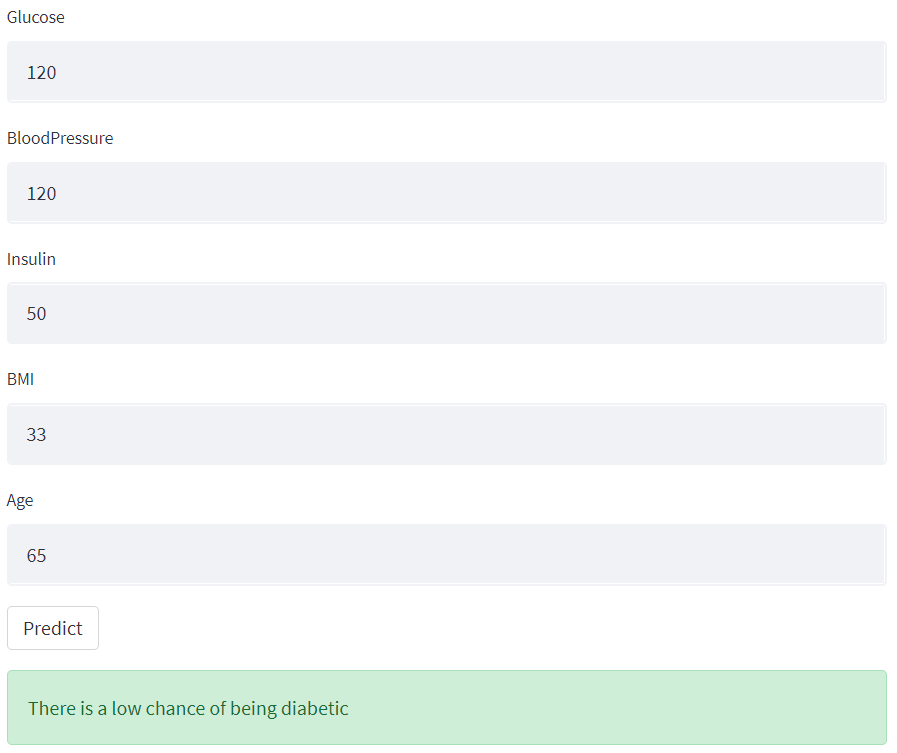